In [22]:
import sklearn as sk
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
mnist = fetch_openml('mnist_784')

In [9]:
X = mnist.data.to_numpy()
Y = mnist.target.to_numpy()
X/=255.0

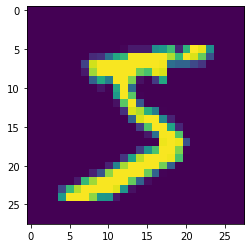

In [12]:
plt.imshow(X[0].reshape(28,28))

## Эксперименты с расстоянием

In [20]:
dist = lambda a,b : np.sum((a-b)**2)

In [33]:
def avdist(same):
  d=0.0
  for _ in range(100):
    i = random.randint(0, len(X))
    while True:
      j = random.randint(0, len(X))
      if (Y[i]==Y[j] and same) or (Y[i]!=Y[j] and not same):
        break
    d+=dist(X[i],X[j])
  return d/100.0

avdist(True), avdist(False)

(87.14505851595537, 114.01090319108033)

## K-NN классификатор

In [46]:
X_train, X_test, Y_train, Y_test = \
   sk.model_selection.train_test_split(X,Y,train_size=20000, test_size=2000,shuffle=True)

In [47]:
x = X_test[0]

In [48]:
def classify(x):
  return Y_train[np.argmin([dist(x,z) for z in X_train])]

classify = lambda x: Y_train[np.argmin([dist(x,z) for z in X_train])]

classify(x)

'0'

In [49]:
n = 300
c = 0
for i in range(n):
  r = classify(X_test[i])
  #print(f"{Y_test[i]} классифицирована как {r}")
  if r==Y_test[i]:
    c+=1
print(c/n)

0.9633333333333334


## Оптимизация гиперпараметров

In [52]:
import sklearn.neighbors
for k in range(1,10):
  model = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,Y_train)
  acc = sk.metrics.accuracy_score(Y_test,model.predict(X_test))
  print(f"{k} -> {acc}")

1 -> 0.9685
2 -> 0.9555
3 -> 0.963
4 -> 0.964
5 -> 0.965
6 -> 0.9645
7 -> 0.966
8 -> 0.9625
9 -> 0.9595


## K-Means

In [79]:
import sklearn.cluster

nc=15

model = sk.cluster.KMeans(n_clusters=nc).fit(X)

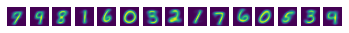

In [80]:
fig,ax = plt.subplots(1,nc)
for i in range(nc):
  ax[i].imshow(model.cluster_centers_[i].reshape(28,28))
  ax[i].axis('off')

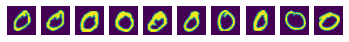

In [67]:
c = 6

fig,ax = plt.subplots(1,10)
for i in range(10):
  ax[i].imshow(X[model.labels_==c][i].reshape(28,28))
  ax[i].axis('off')

In [71]:
Yn = Y.astype(int)
Yn

array([5, 0, 4, ..., 4, 5, 6])

(array([5040.,    0.,   56.,   21.,    9.,   59.,   74.,   21.,   37.,
          50.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

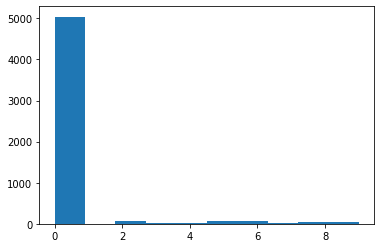

In [72]:
plt.hist(Yn[model.labels_==6])

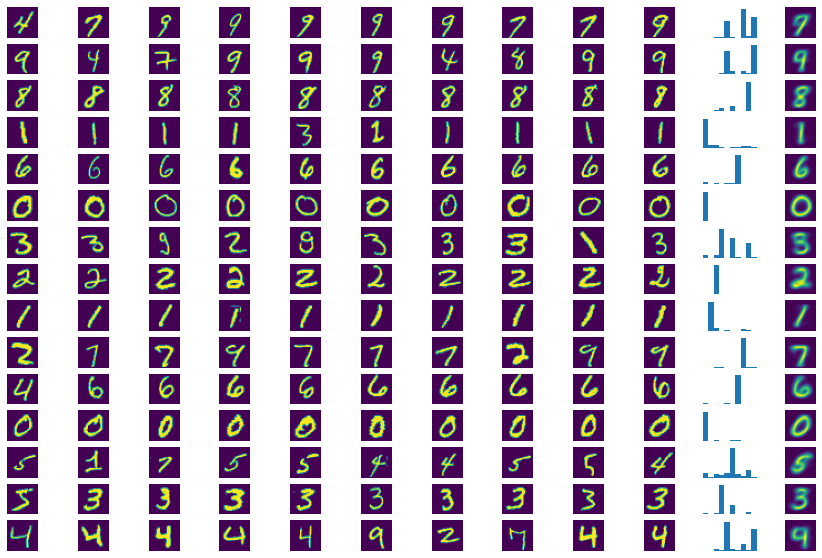

In [81]:
fig,ax = plt.subplots(nc,12,figsize=(15,10))
for c in range(nc):
  for i in range(10):
    ax[c,i].imshow(X[model.labels_==c][i].reshape(28,28))
    ax[c,i].axis('off')
  ax[c,10].hist(Yn[model.labels_==c])
  ax[c,10].axis('off')
  ax[c,11].imshow(model.cluster_centers_[c].reshape(28,28))
  ax[c,11].axis('off')

In [92]:
from sklearn.datasets import fetch_olivetti_faces
faces, labels = fetch_olivetti_faces(return_X_y=True, shuffle=True)
faces.shape

(400, 4096)

In [93]:
labels

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

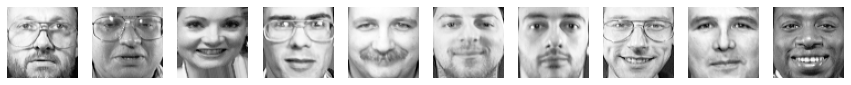

In [89]:
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
  ax[i].imshow(1-faces[i].reshape(64,64),cmap='Greys')
  ax[i].axis('off')

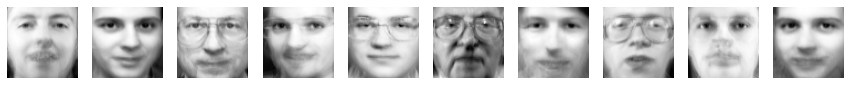

In [90]:
model = sk.cluster.KMeans(n_clusters=40).fit(faces)

fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
  ax[i].imshow(-model.cluster_centers_[i].reshape(64,64),cmap='Greys')
  ax[i].axis('off')

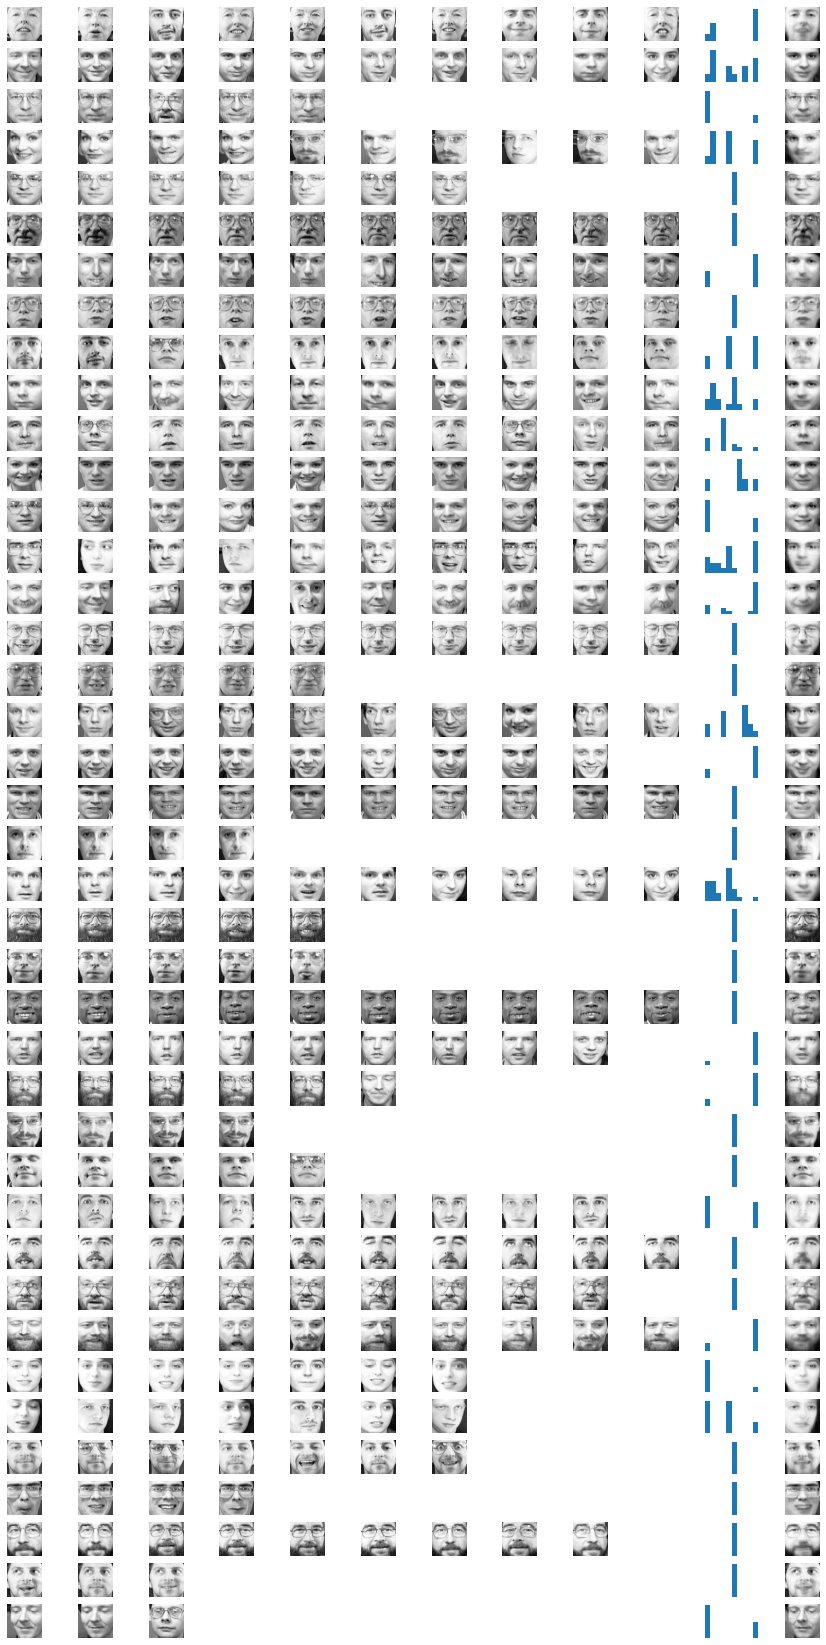

In [96]:
fig,ax = plt.subplots(nc,12,figsize=(15,30))
nc=40
for c in range(nc):
  for i in range(10):
    if i<len(faces[model.labels_==c]):
      ax[c,i].imshow(-faces[model.labels_==c][i].reshape(64,64),cmap='Greys')
    ax[c,i].axis('off')
  ax[c,10].hist(labels[model.labels_==c])
  ax[c,10].axis('off')
  ax[c,11].imshow(-model.cluster_centers_[c].reshape(64,64),cmap='Greys')
  ax[c,11].axis('off')

## Выделение основных цветов

In [102]:
import imageio
import cv2

In [106]:
img = imageio.imread("https://www.widoczki.com/widoczki/2/gory-promienie-choinki-lasy-sloneczne.jpeg")

In [100]:
img.shape

(1920, 2560, 3)

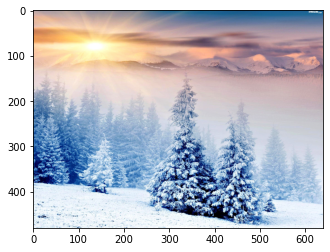

In [107]:
img = cv2.resize(img,(640,480))/255.0
plt.imshow(img)

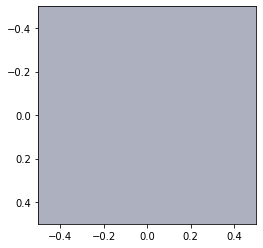

In [126]:
plt.imshow(np.expand_dims(np.mean(img,axis=(0,1)),(0,1)))

In [128]:
img.reshape(-1,3).shape

(307200, 3)

In [146]:
nc = 4
model = sk.cluster.KMeans(n_clusters=nc).fit(img.reshape(-1,3))

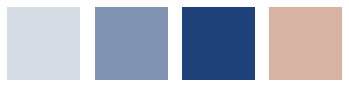

In [147]:
fig,ax = plt.subplots(1,nc)
for i in range(nc):
  ax[i].imshow(np.expand_dims(model.cluster_centers_[i],(0,1)))
  ax[i].axis('off')

## Поиск числа кластеров. Elbow Method

In [139]:
intertias = []
for c in range(1,15):
  model = sk.cluster.KMeans(n_clusters=c).fit(img.reshape(-1,3))
  print(f"{c} -> {model.inertia_}")
  intertias.append(model.inertia_)

1 -> 43241.584896824934
2 -> 18745.130115346055
3 -> 12143.217786408748
4 -> 9289.396432080963
5 -> 7256.576667559077
6 -> 5598.993159935861
7 -> 4599.472572772675
8 -> 3930.1468172681243
9 -> 3387.4133028500746
10 -> 3013.7092731104267
11 -> 2697.1755046923035
12 -> 2417.5627235950824
13 -> 2213.9694114843587
14 -> 2021.8495313332032


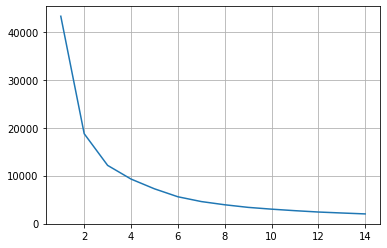

In [143]:
plt.plot(range(1,15),intertias)
plt.grid()

## Понижение размерности. Метод главных компонент

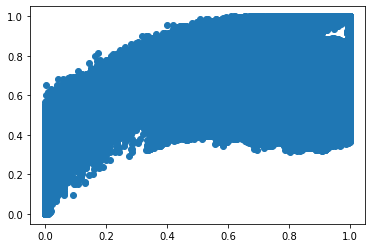

In [152]:
import sklearn.decomposition

I = img.reshape(-1,3)
plt.scatter(I[:,0],I[:,2])

In [153]:
x = sk.decomposition.PCA(n_components=2).fit_transform(I)
x.shape

(307200, 2)

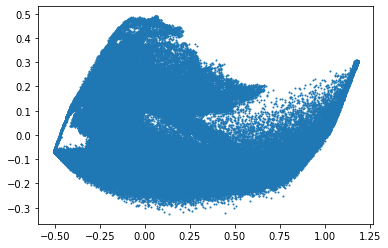

In [156]:
plt.scatter(x[:,0],x[:,1],s=1)

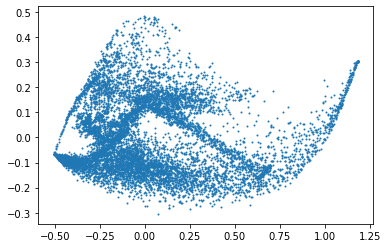

In [159]:
idx = np.random.randint(0,len(x),10000)
plt.scatter(x[idx,0],x[idx,1],s=1)

In [164]:
X = mnist.data.to_numpy()
Y = mnist.target.to_numpy()
Yc = Y.astype(int)
X/=255.0

In [161]:
x = sk.decomposition.PCA(n_components=2).fit_transform(X)
x.shape

(70000, 2)

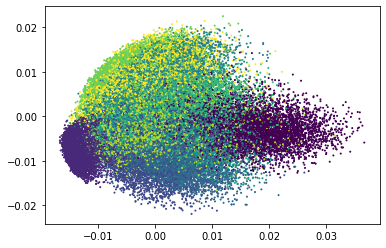

In [165]:
plt.scatter(x[:,0],x[:,1],s=1,c=Yc)

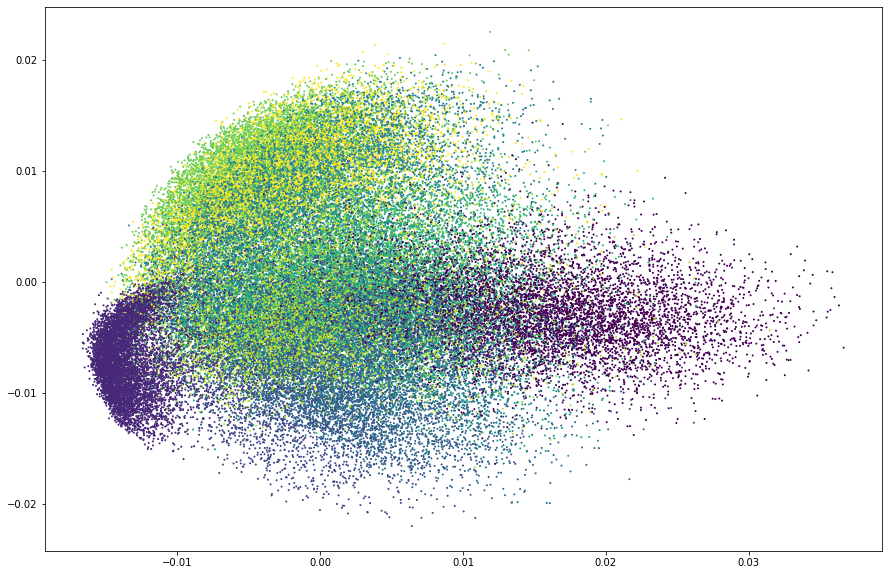

In [169]:
idx = np.arange(len(x))
plt.figure(figsize=(15,10))
plt.scatter(x[idx,0],x[idx,1],s=1,c=Yc[idx])

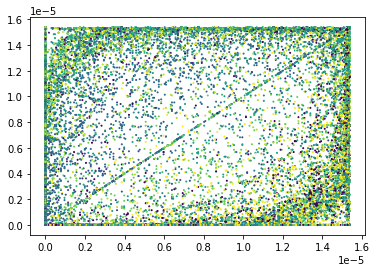

In [175]:
plt.scatter(X[:,346],X[:,347],s=1,c=Yc)

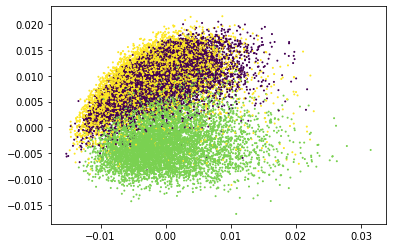

In [181]:
def plot_subset(s):
  m = [c in s for c in Yc]
  plt.scatter(x[m,0],x[m,1],s=1,c=Yc[m])

plot_subset({4,8,9})


## Исследуем страны

In [183]:
import pandas as pd
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [188]:
df.describe().T[['mean','min','max']]

,mean,min,max
child_mort,38.270060,2.6000,208.00
exports,41.108976,0.1090,200.00
health,6.815689,1.8100,17.90
imports,46.890215,0.0659,174.00
income,17144.688623,609.0000,125000.00
inflation,7.781832,-4.2100,104.00
life_expec,70.555689,32.1000,82.80
total_fer,2.947964,1.1500,7.49
gdpp,12964.155689,231.0000,105000.00


In [189]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [192]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = df[features]
Y = df['country']

In [193]:
x = sk.decomposition.PCA(n_components=2).fit_transform(X)

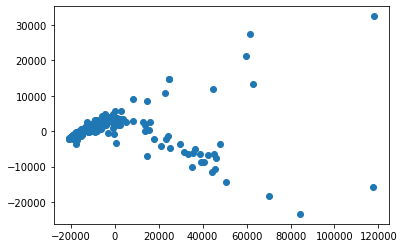

In [194]:
plt.scatter(x[:,0],x[:,1])

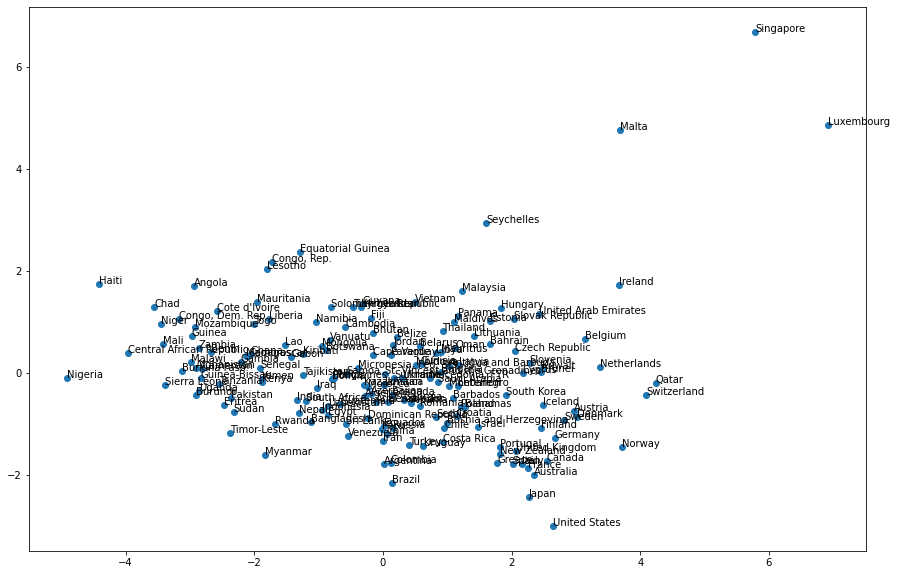

In [198]:
scaler = sk.preprocessing.StandardScaler()
Xs = scaler.fit_transform(X)
x = sk.decomposition.PCA(n_components=2).fit_transform(Xs)
plt.figure(figsize=(15,10))
plt.scatter(x[:,0],x[:,1])
for c,(u,v) in zip(Y,x):
  plt.annotate(c,(u,v))

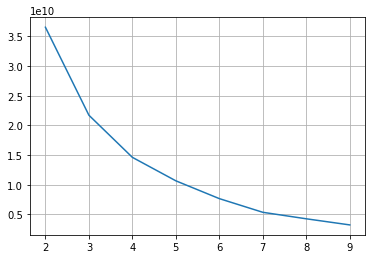

In [205]:
inertias = []
for c in range(2,10):
  model = sk.cluster.KMeans(c).fit(X)
  inertias.append(model.inertia_)

plt.plot(range(2,10),inertias)
plt.grid()

In [206]:
nc = 4
model = sk.cluster.KMeans(nc).fit(X)

In [207]:
df['cluster'] = model.labels_

In [208]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [211]:
list(zip(features,model.cluster_centers_[3]))

[('child_mort', 5.042857142857152),
 ('exports', 55.528571428571425),
 ('health', 9.373809523809523),
 ('imports', 47.20952380952381),
 ('income', 47571.428571428565),
 ('inflation', 2.7681428571428572),
 ('life_expec', 80.45714285714286),
 ('total_fer', 1.7776190476190474),
 ('gdpp', 46085.7142857143)]

In [215]:
Y[model.labels_==3]

4      Antigua and Barbuda
5                Argentina
10                 Bahamas
11                 Bahrain
13                Barbados
33                   Chile
41                 Croatia
42                  Cyprus
43          Czech Republic
49       Equatorial Guinea
51                 Estonia
60                  Greece
67                 Hungary
74                  Israel
79              Kazakhstan
85                  Latvia
89                   Libya
90               Lithuania
95                Malaysia
98                   Malta
111            New Zealand
115                   Oman
121                 Poland
122               Portugal
124                Romania
125                 Russia
128           Saudi Arabia
131             Seychelles
134        Slovak Republic
135               Slovenia
138            South Korea
139                  Spain
153                 Turkey
160                Uruguay
163              Venezuela
Name: country, dtype: object

In [214]:
df[df['country']=='Russia']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
125,Russia,10.0,29.2,5.08,21.1,23100,14.2,69.2,1.57,10700,3


In [218]:
res = df.groupby('cluster').agg({ 'inflation' : 'mean', 'country' : lambda x: ', '.join(x) })
res

,inflation,country
cluster,,
0,9.204111,"Afghanistan, Albania, Algeria, Angola, Armenia..."
1,2.768143,"Australia, Austria, Belgium, Brunei, Canada, D..."
2,5.516667,"Luxembourg, Norway, Qatar"
3,6.595457,"Antigua and Barbuda, Argentina, Bahamas, Bahra..."


In [224]:
for i,x in res.iterrows():
  print(x['country'])

Afghanistan, Albania, Algeria, Angola, Armenia, Azerbaijan, Bangladesh, Belarus, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Cape Verde, Central African Republic, Chad, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Costa Rica, Cote d'Ivoire, Dominican Republic, Ecuador, Egypt, El Salvador, Eritrea, Fiji, Gabon, Gambia, Georgia, Ghana, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lebanon, Lesotho, Liberia, Macedonia, FYR, Madagascar, Malawi, Maldives, Mali, Mauritania, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Mozambique, Myanmar, Namibia, Nepal, Niger, Nigeria, Pakistan, Panama, Paraguay, Peru, Philippines, Rwanda, Samoa, Senegal, Serbia, Sierra Leone, Solomon Islands, South Africa, Sri Lanka, St. Vincent and the Grenadines, Sudan, Suriname, Tajikistan, Tanzania, T